# 분석 2주차 과제

# 1. LinearRegression

In [83]:
import pandas as pd
from sklearn.linear_model import LinearRegression
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [84]:
# 단순선형회귀
list_y = []
# 1부터 20까지 X data를 만들어주었습니다.
X = np.arange(1,21) 
# X에 임의의 수를 더해 임의의 Y data를 만듭니다.
for x in X:
    list_y.append(x+np.random.randint(6))
Y = np.array(list_y)
df = pd.DataFrame({'X':X,'Y':Y})

In [85]:
# 데이터 확인
df.head(5)

,X,Y
0,1,4
1,2,3
2,3,5
3,4,8
4,5,9


In [86]:
# 모델 생성 후 학습시키기

# normalize = True를 하면 X데이터에 정규화를 진행한다.
LinReg = LinearRegression(
    fit_intercept = True, normalize = True, copy_X = True
)
X, Y = X.reshape(-1, 1), Y.reshape(-1, 1)
LinReg.fit(X, Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

In [87]:
# 회귀계수 구해보기

# 회귀계수는, 즉 W의 값은 fit() method에 대해서 입력받은 x, y data를 이용해서 coef_ 속성에 저장이 된다.
# 이는 (Target 값의 개수, Feature의 개수)의 형태로 출력이 될 것이다.

print('회귀 계수 : {}'.format(LinReg.coef_))

회귀 계수 : [[0.93007519]]


In [88]:
# 상수항 구해보기

print('상수항 : {}'.format(LinReg.intercept_))

상수항 : [2.88421053]


**LinearRegressoion을 이용하여 X data에 대해 학습을 진행한 후 직선의 방정식을 구해주세요.**

[답] : Y = 2.88421053 + X * 0.93007519

**X data에 대해 예측을 수행한 후, 그래프를 통해 학습데이터와 회귀직선을 나타내보세요.**

예측 : [[ 3.81428571]
 [ 4.7443609 ]
 [ 5.67443609]
 [ 6.60451128]
 [ 7.53458647]
 [ 8.46466165]
 [ 9.39473684]
 [10.32481203]
 [11.25488722]
 [12.18496241]
 [13.11503759]
 [14.04511278]
 [14.97518797]
 [15.90526316]
 [16.83533835]
 [17.76541353]
 [18.69548872]
 [19.62556391]
 [20.5556391 ]
 [21.48571429]]


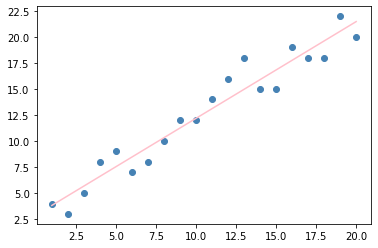

In [89]:
# X data에 대해 예측
Y_pred = LinReg.predict(X)
print('예측 : {}'.format(Y_pred))

# 점(학습데이터)들 찍어보기
plt.scatter(X, Y, color = 'steelblue')

# 회귀직선 그려보기
plt.plot(X, Y_pred, color = 'pink')
plt.show()

**회귀분석 평가지표 중 하나를 골라 구해보세요**
- MSE, RMSE, R2_score 등

In [90]:
# 여기에 구해보세요!
from sklearn.metrics import mean_squared_error, r2_score

MSE = mean_squared_error(Y, Y_pred)
RMSE = np.sqrt(MSE)
R2 = r2_score(Y, Y_pred)

print('MSE : {} RMSE : {} R2_score : {}'.format(MSE, RMSE, R2))

MSE : 1.9649248120300744 RMSE : 1.4017577579703544 R2_score : 0.9360532157829282


# Logistic Regression

In [91]:
# 사이킷런의 데이터셋 로드
from sklearn.datasets import load_breast_cancer

In [92]:
breast_cancer = load_breast_cancer()
df = pd.DataFrame(data = breast_cancer.data, columns = breast_cancer.feature_names)
df["label"] = breast_cancer.target
df.columns = [ col.replace(" ", "_") for col in df.columns]

In [93]:
# 데이터가 잘 로드되었는지 확인해보세요
df.head(5)

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,mean_compactness,mean_concavity,mean_concave_points,mean_symmetry,mean_fractal_dimension,radius_error,texture_error,perimeter_error,area_error,smoothness_error,compactness_error,concavity_error,concave_points_error,symmetry_error,fractal_dimension_error,worst_radius,worst_texture,worst_perimeter,worst_area,worst_smoothness,worst_compactness,worst_concavity,worst_concave_points,worst_symmetry,worst_fractal_dimension,label
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [94]:
df.columns

Index(['mean_radius', 'mean_texture', 'mean_perimeter', 'mean_area',
       'mean_smoothness', 'mean_compactness', 'mean_concavity',
       'mean_concave_points', 'mean_symmetry', 'mean_fractal_dimension',
       'radius_error', 'texture_error', 'perimeter_error', 'area_error',
       'smoothness_error', 'compactness_error', 'concavity_error',
       'concave_points_error', 'symmetry_error', 'fractal_dimension_error',
       'worst_radius', 'worst_texture', 'worst_perimeter', 'worst_area',
       'worst_smoothness', 'worst_compactness', 'worst_concavity',
       'worst_concave_points', 'worst_symmetry', 'worst_fractal_dimension',
       'label'],
      dtype='object')

## **[변수 설명]** 
radius : 반경(중심에서 외벽까지 거리들이 평균값) <br>
texture : 질감 <br>
perimeter : 둘레 <br>
area : 면적 <br>
smoothness : 매끄러움 <br>
compactness : 조그만 정도<br>
concavity : 오목함(윤곽의 오목한 부분의 정도)<br>
points : 오목한 점의 수<br>
symmetry : 대칭<br>
dimension : 프랙탈 차원<br>

In [95]:
# 이번엔 mean이 들어간 변수만 사용해보겠습니다!
# mean이 들어간 변수만 따로 뽑아 X와 Y데이터를 만들어주세요.
def onlyMean(arr):
    res = []
    for column in arr:
        if 'mean' in column.split('_'):
            res.append(column)
    return res
meancol = onlyMean(list(df.columns))

dfMean = df.loc[:, meancol]

X, Y = dfMean, df['label']

In [96]:
X.head()

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,mean_compactness,mean_concavity,mean_concave_points,mean_symmetry,mean_fractal_dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883


**Heatmap을 통해 X변수 간 상관관계를 확인해보세요!**

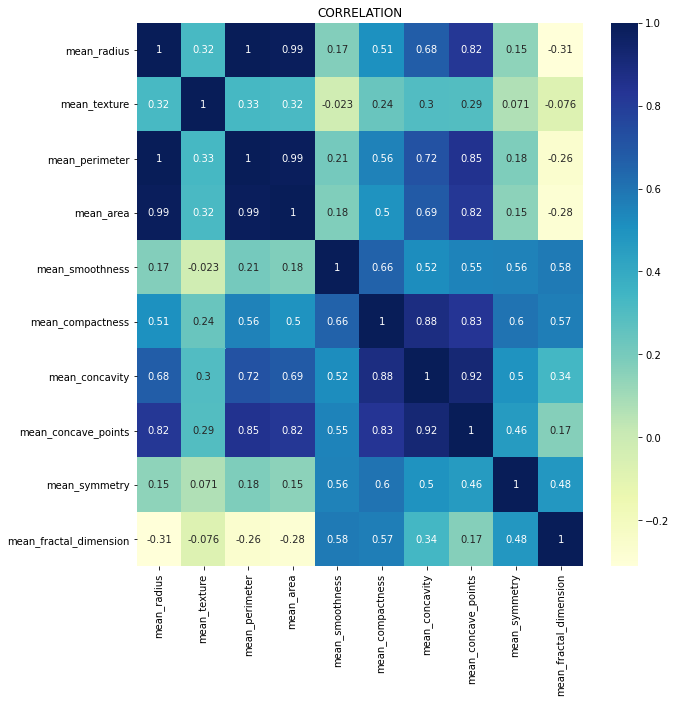

In [97]:
# heatmap을 통해 상관관계 확인

import seaborn as sns

plt.figure(figsize = (10,10))
plt.title('CORRELATION')
corrdf = dfMean.corr()
ax = sns.heatmap(corrdf, cmap="YlGnBu", annot = True)

**강한 상관관계가 있는 변수들을 적어보세요!
그리고 다중공선성과 그로 인한 문제에 대해 서술해주세요.**

[답]

1. 같은 column의 경우에는 당연히 상관 계수가 1이 나오는 것이 맞으나 heatmap 그래프에서 더 진한 색일 수록 강한 상관관계를 가짐을 이용하면 'mean_radius'와 'mean_perimiter'이라는 두 변수가 강한 상관관계를 가짐을 확인할 수 있다.

2. 다중 일부 독립 변수가 다른 독립 변수와 높은 상관관계를 가질 때 이를 '다중 공선성 문제'가 있다고 정의한다. 이는 VIF라는 측정값으로 판단을 한다. 
  - VIF는 각각의 변수에 대해서 다른 모든 변수에 대해 '입력 변수로는 설명이 불가능한 변동 비율'의 역수로 정의 한다. 즉, 변수간의 상관 관계가 높을수록 그 값이 커진다.
  - 그러나 이 값이 과도하게, 10보다 클 떄에는 '다중 공선성 문제'가 있다고 판단하며, 이렇게 되면 회귀선의 판단 능력이 저하된다는 문제가 생긴다.
  - 특히나 최소 제곱법 기반의 회귀 계수 계산을 하는 경우에는 독립 변수들의 독립성에 영향을 많이 받기 때문에 다중공선성 문제의 해결을 위해서 중요한, 독립적인 독립 변수만을 남기거나 규제 적용, 차원 축소 등의 regulation 과정을 거치는 이유를 이해 할 수 있다.


**강한 상관관계를 가진 변수 중 일부 변수를 선택하여 X 변수를 다시 만들어주세요.**

In [98]:
from sklearn.model_selection import train_test_split

X, Y = df[['mean_radius', 'mean_perimeter']], df['label']
# 학습 데이터와 테스트 데이터 분할
X_train,X_test,Y_train,Y_test = train_test_split(X,Y, test_size=0.3, random_state=1)

**로지스틱 회귀 모델 생성 후, test data에 대해 예측을 수행해주세요.**

In [109]:
from sklearn.linear_model import LogisticRegression

LogReg = LogisticRegression(
    solver = 'liblinear', multi_class = 'ovr', random_state = 0, max_iter = 10000
)
LogReg.fit(X_train, Y_train)
Ypred = np.array(LogReg.predict(X_test))
print('예측 : {}'.format(Ypred))

예측 : [0 1 1 0 1 0 0 0 1 1 1 1 0 1 1 1 1 1 1 0 1 1 0 1 0 1 0 0 0 0 0 1 0 1 1 1 0
 1 1 1 1 1 1 1 1 0 1 1 1 0 0 0 1 1 1 1 1 0 1 1 1 0 0 1 1 1 1 0 1 1 1 1 1 0
 1 0 1 1 1 0 1 0 1 0 1 1 0 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0
 1 1 1 0 0 1 1 1 1 1 0 0 1 1 0 0 1 0 0 1 0 1 0 1 0 0 0 1 1 1 0 1 0 1 1 1 1
 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 0 0 0 1 1]


**Confusion Matrix를 구하고 이를 이용하여 accuracy, precision, recall을 직접 구해보세요!**

In [110]:
from sklearn.metrics import confusion_matrix

Ypred = np.array(list(map(lambda x : 0 if x > 0.5 else 1, Ypred)))
CM = confusion_matrix(Y_test, Ypred)
CM
# 출력된 오차 행렬은 ndarray의 형태로, 왼쪽 위 부터 순서대로 TN, FP, FN, TP의 값에 해당한다. 

array([[ 14,  49],
       [102,   6]])

In [111]:
TN, FP, FN, TP = CM[0][0], CM[0][1], CM[1][0], CM[1][1]

In [112]:
# accuracy

# 정확도 = 예측 결과와 실제 값이 동일한 개수 / 전체 수 = (TN + TP) / (TN + TP + FP + FN)
acc = (TN + TP) / (TN + TP + FP + FN)

In [113]:
# precision

# 정밀도 = TP / (FP + TP)
prec = TP / (FP + TP)

In [114]:
# recall

# 재현율 = TP / (FN + TP)
rec = TP / (FN + TP)

In [115]:
print('Accuracy : {} Precision : {} Recall : {}'.format(acc, prec, rec))

Accuracy : 0.11695906432748537 Precision : 0.10909090909090909 Recall : 0.05555555555555555


In [116]:
# 로지스틱 회귀의 회귀계수

# 회귀계수
print('회귀계수 : {}'.format(LogReg.coef_))

# output = array([[ 3.72536188 -0.63469662]]) = [W1, W2]
# 회귀 계수는 위에서 설정한 dataframe의 mean_radius와 mean_perimeter이라는 독립 변수의 값에 영향을 미친다.

# odds = p(x) / (1 - p(x)) = exp(Y_hat)
# logit = log(odds) = Y_hat

회귀계수 : [[ 3.72536188 -0.63469662]]


In [118]:
LogReg.intercept_  # 모델의 절편

array([6.18861286])

In [123]:
logit = np.exp(LogReg.coef_) # 확률값
odds = LogReg.coef_ # 모델의 회귀계수 값

In [125]:
print('Odd : {} Logit : {}'.format(odds, logit))

Odd : [[ 3.72536188 -0.63469662]] Logit : [[41.48624301  0.53009628]]


**회귀계수를 구해보고 그 중 변수 2개를 골라 결과를 해석해보세요! (logit관점/odds관점) **

[답]  
p(x) = 2.60744095 * X1 + -0.56046248 * X2 + 6.18861286
1. Logit 관점
  - 암이 있는 사람이 암이 없는 사람에 비해서 종양 추정 물질의 반경의 크기가 클 logit이 41.48624301배 증가한다.
  - 암이 있는 사람이 암이 없는 사람에 비해서 종양 추정 물질의 둘레가 클 logit이 52.009628배 증가한다.

2. Odds 관점 (결국에는 이 값이 특정 변수를 만족시키는 확률값으로 봐도 무방하다)
  - 암이 있는 사람이 암이 없는 사람에 비해서 종양 추정 물질의 반경의 크기가 더 클 확률이 3.72536188%이다.
  - 암이 있는 사람이 암이 없는 사람에 비해서 종양 추정 물질의 둘레가 작을 확률이 0.63469662%, 즉 더 클 확률이 99.36530338%인 것이다.


### 주어진 데이터셋을 이용하여 주어진 문제를 해결해주세요.

In [40]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

## - Feature Scaling

In [41]:
from sklearn.datasets import load_iris

#iris 데이터셋 로드
iris=load_iris()
iris_data=iris.data
iris_df=pd.DataFrame(data=iris_data, columns=iris.feature_names)

iris_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


#### 1. iris 데이터셋에 MinMaxScaler를 적용하고 각 칼럼별 평균과 분산을 구하세요.

In [42]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(iris_df)
scaledIris_df = pd.DataFrame(data = scaler.fit_transform(iris_df), columns = iris.feature_names)

print('Feature Means')
print(scaledIris_df.mean())
print('Feature Variance')
print(scaledIris_df.var())

Feature Means
sepal length (cm)    0.428704
sepal width (cm)     0.440556
petal length (cm)    0.467458
petal width (cm)     0.458056
dtype: float64
Feature Variance
sepal length (cm)    0.052908
sepal width (cm)     0.032983
petal length (cm)    0.089522
petal width (cm)     0.100869
dtype: float64


#### 2. iris 데이터셋에 StandardScaler를 적용하고 각 칼럼별 평균과 분산을 구하세요.

In [45]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaledIris_df = pd.DataFrame(data = scaler.fit_transform(iris_df), columns = iris.feature_names)

print('Feature Means')
print(scaledIris_df.mean())
print()
print('Feature Variance')
print(scaledIris_df.var())

Feature Means
sepal length (cm)   -1.690315e-15
sepal width (cm)    -1.842970e-15
petal length (cm)   -1.698641e-15
petal width (cm)    -1.409243e-15
dtype: float64

Feature Variance
sepal length (cm)    1.006711
sepal width (cm)     1.006711
petal length (cm)    1.006711
petal width (cm)     1.006711
dtype: float64


#### 3. normalization과 standardization의 차이점을 설명하세요.

1. Normalization, 즉 정규화는 서로 다른 feature(특징)의 크기를 통일하기 위해 크기를 변환해 준다. 즉, 단위가 다른 데이터가 있다거 할 때 이를 정량적으로 비교하기 힘들어 오류가 발생할 상황을 위해서 개별 데이터의 크기를 모두 같은 단위로 바꾸어 준다. 
2. 반면에 Standardization, 즉 표준화는 평균이 0이고 표준편차가 1인 데이터로 변환해 준다.
  - sklearn을 이용하야 예측을 할 때 SVM, Linear Regression, Logistic Regression을 사용하게 되면 이 모델들은 데이터가 정규화된 상태로 가정하고 예측하기 때문에 사전에 표준화를 해 주는 것이 매우 중요하다.

## - Regularization

In [46]:
from sklearn.datasets import load_boston

#boston 집값 데이터셋 로드
boston=load_boston()
boston_price=boston.target
boston_data=boston.data
boston_df=pd.DataFrame(data=boston_data, columns=boston.feature_names)

boston_df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


#### 4. training data와 test data를 분리해주세요(비율 자유)

In [73]:
x_train, x_test, y_train, y_test = train_test_split(boston_df, boston_price, test_size = 0.2, random_state = 1)

#### 5. LinearRegression, Ridge, Lasso 각각의 방법으로 모델을 학습시키고 예측하여 RMSE값을 구해주세요. 세 경우의 RMSE값을 비교해주세요.

In [74]:
# LinearRegression
from sklearn.metrics import mean_squared_error

# LinearRegression에 적용하기 전에 StandardScaler을 이용하여 x_train에 대해 fit()를 적용한 scaler을 이용해서 x_test에 fit_transform()을 적용해야한다.
scaler = StandardScaler()
x_train_scaled, x_test_scaled = scaler.fit_transform(x_train), scaler.transform(x_test)

LInReg = LinearRegression()
LinReg.fit(x_train_scaled, y_train)
y_predict = LinReg.predict(x_test_scaled)

RMSE = np.sqrt(mean_squared_error(y_test, y_predict))
print('RMSE값 : {}'.format(RMSE))

RMSE값 : 4.835373458200535


In [77]:
#Ridge
from sklearn.linear_model import Ridge

parameters = {'alpha' : np.random.rand(1000)}
RidgeReg = Ridge()

clf = GridSearchCV(RidgeReg, parameters)
clf.fit(x_train_scaled, y_train)

y_predict = clf.predict(x_test_scaled)
RMSE2 = np.sqrt(mean_squared_error(y_test, y_predict))
print('RMSE값 : {}'.format(RMSE2))

RMSE값 : 4.835512731836524


In [78]:
#Lasso
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

parameters = {'alpha' : np.random.rand(1000)}
LassoReg = Lasso()

clf = GridSearchCV(LassoReg, parameters)
clf.fit(x_train_scaled, y_train)

y_predict = clf.predict(x_test_scaled)
RMSE3 = np.sqrt(np.mean(list(map(lambda x: x**2, y_predict - y_test))))
print('RMSE값 : {}'.format(RMSE3))

RMSE값 : 4.846690475432399


In [79]:
# RMSE과 비교
# 매우 근소한 차이이지만 Linear Regression, Ridge, Lasso의 순으로 RMSE값이 증가한다.

** 

# 수고하셨습니다 :D